In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer("multi-qa-MiniLM-L6-cos-v1")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
desc=model.cuda()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Pibit.ai/train.csv', index_col=5)
df.head()

,LossDescription,ResultingInjuryDesc,PartInjuredDesc,Cause - Hierarchy 1,Body Part - Hierarchy 1
Index,,,,,
577,EE while helping the children clean up after l...,Fall Or Slip Injury,Lower Extremities,"Fall, Slip or Trip Injury",Lower Extremities
1867,Clmt was putting bread trays on bottom of brea...,NaN,NaN,Burn or Scald - Heat or Cold Exposures - Conta...,Neck
3530,He got off of he forklift and did not secure p...,"Motor Vehicle, NOC","Foot-Metatarsals, Heel excl Ankle or Toe",Motor Vehicle,Lower Extremities
583,slammed left finger in closet,Struck Or Injured By,Upper Extremities,Struck or Injured by,Upper Extremities
1711,the employee was digging a tre; strain; lower ...,NaN,NaN,Strain or Injury by,Trunk


In [4]:
len(df), df.nunique()

(3918,
 LossDescription            3271
 ResultingInjuryDesc         701
 PartInjuredDesc             435
 Cause - Hierarchy 1          16
 Body Part - Hierarchy 1       8
 dtype: int64)

In [7]:
df_cause = df.drop(['Body Part - Hierarchy 1'], axis=1)
df_body = df.drop(['Cause - Hierarchy 1'], axis=1)

Cause Classification

In [8]:
df_cause = df_cause[df_cause['Cause - Hierarchy 1'].notna()]
len(df_cause)

3892

In [9]:
df_cause['LossDescription'] = df_cause['LossDescription'].str.lower()
df_cause['ResultingInjuryDesc'] = df_cause['ResultingInjuryDesc'].str.lower()
df_cause['PartInjuredDesc'] = df_cause['PartInjuredDesc'].str.lower()
df_cause['Cause - Hierarchy 1'] = df_cause['Cause - Hierarchy 1'].str.lower()
df_cause['Cause - Hierarchy 1']=df_cause['Cause - Hierarchy 1'].str.replace(',','')

In [10]:
df_cause =df_cause.fillna("")

In [11]:
import re
def cleaning_numbers(data): #removing numbers
    return re.sub('[0-9]+', '', data)

def cleaning_non_alpha(text): #removing non-alpha
  return re.sub("[^a-z0-9]"," ", text)

def cleaning_repeating_char(text): #removing repeating characters
    return re.sub(r'(.)1+', r'1', text)

df_cause['LossDescription'] = df_cause['LossDescription'].apply(lambda x: cleaning_numbers(x))
df_cause['LossDescription'] = df_cause['LossDescription'].apply(lambda x: cleaning_non_alpha(x))
df_cause['LossDescription'] = df_cause['LossDescription'].apply(lambda x: cleaning_repeating_char(x))

In [12]:
df_cause.head(3)

,LossDescription,ResultingInjuryDesc,PartInjuredDesc,Cause - Hierarchy 1
Index,,,,
577,ee while helping the children clean up after l...,fall or slip injury,lower extremities,fall slip or trip injury
1867,clmt was putting bread trays on bottom of brea...,,,burn or scald - heat or cold exposures - conta...
3530,he got off of he forklift and did not secure p...,"motor vehicle, noc","foot-metatarsals, heel excl ankle or toe",motor vehicle


In [10]:
df_cause['LossDescription'][577]

'ee while helping the children clean up after lunch  she slipped on a piece of lego and injured her left leg  left knee '

In [ ]:
df_cause.nunique()

LossDescription        3236
ResultingInjuryDesc     639
PartInjuredDesc         387
Cause - Hierarchy 1      11
dtype: int64

In [11]:
import random
import numpy as np

train_size = int(0.8 * len(df_cause))
val_size = int(0.2 * len(df_cause))

indeces = np.arange(0, len(df_cause))
random.shuffle(indeces)

train_idx = indeces[0:train_size]
val_idx = indeces[train_size:(train_size + val_size)]

assert(len(train_idx) == train_size)
assert(len(val_idx) == val_size)

print('  Training size: {:,}'.format(train_size))
print('Validation size: {:,}'.format(val_size))

  Training size: 3,113
Validation size: 778


In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_cause['Cause - Hierarchy 1']= label_encoder.fit_transform(df_cause['Cause - Hierarchy 1'])
df_cause['Cause - Hierarchy 1'].unique()

array([ 3,  0,  6, 10,  8,  5,  9,  2,  1,  7,  4])

In [13]:
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
le_name_mapping

{'burn or scald - heat or cold exposures - contact with': 0,
 'caught in under or between': 1,
 'cut puncture scrape injured by': 2,
 'fall slip or trip injury': 3,
 'includes freezing': 4,
 'misc': 5,
 'motor vehicle': 6,
 'rubbed or abraded by': 7,
 'strain or injury by': 8,
 'striking against or stepping on': 9,
 'struck or injured by': 10}

In [ ]:
match_embeddings = model.encode(list(le_name_mapping.keys()))
match_embeddings

array([[ 0.0310415 ,  0.03654285,  0.05994296, ..., -0.01185007,
        -0.1485745 ,  0.06040021],
       [ 0.06519714,  0.05726551,  0.02865826, ..., -0.07579021,
        -0.06300105,  0.06456565],
       [-0.00955608,  0.07459544,  0.09311651, ..., -0.02752728,
         0.06592225,  0.06023522],
       ...,
       [-0.030767  ,  0.0417534 ,  0.05774559, ..., -0.02092095,
         0.08200976,  0.0406785 ],
       [ 0.05359987,  0.06526002,  0.00508324, ..., -0.08644468,
        -0.04398182,  0.05201915],
       [ 0.1028943 ,  0.05561093,  0.05850249, ..., -0.02720897,
         0.01286153,  0.03665236]], dtype=float32)

In [23]:
d=dict(df_cause['Cause - Hierarchy 1'].value_counts())

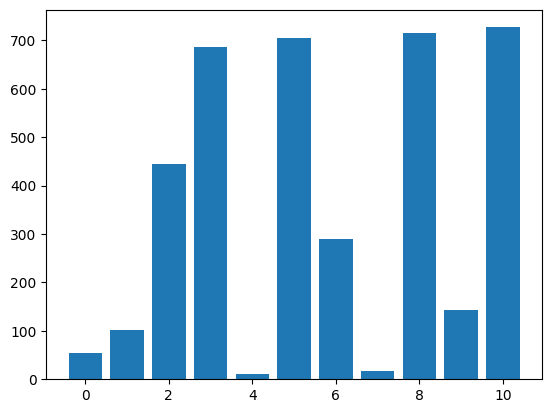

In [24]:
import matplotlib.pyplot as plt
plt.bar(*zip(*d.items()))
plt.show()

In [14]:
sen_w_feats = []
labels = []

for index, row in df_cause.iterrows():
  combined = ""

  if(row["ResultingInjuryDesc"]!="") and isinstance(row["ResultingInjuryDesc"], str):
    combined += "It was a {:} injury. ".format(row["ResultingInjuryDesc"])
  if(row["PartInjuredDesc"]!="") and isinstance(row["PartInjuredDesc"], str):
    combined += "The injured parts were {:}. ".format(row["PartInjuredDesc"])
  if isinstance(row["LossDescription"], str):
    combined += row["LossDescription"]

  sen_w_feats.append(combined)
  labels.append(row["Cause - Hierarchy 1"])

sen_w_feats[56], labels[56]

('event aaa normal day at work  she suddenly felt dizzy and almost fainted  but a coworker avoided the employee to fall ',
 3)

In [ ]:
sen_w_feats[5], labels[5]

('It was a fall or slip injury injury. The injured parts were upper extremities. employee fell down stairs',
 3)

In [ ]:
query_embedding=model.encode(sen_w_feats[5])
print(list(le_name_mapping.keys()))
print("Similarity:", util.dot_score(query_embedding, match_embeddings)) #max similarity with 'fall slip or trip injury'

['burn or scald - heat or cold exposures - contact with', 'caught in under or between', 'cut puncture scrape injured by', 'fall slip or trip injury', 'includes freezing', 'misc', 'motor vehicle', 'rubbed or abraded by', 'strain or injury by', 'striking against or stepping on', 'struck or injured by']
Similarity: tensor([[0.1064, 0.2228, 0.3083, 0.4980, 0.1537, 0.1048, 0.0319, 0.0821, 0.3534,
         0.2903, 0.4722]])


In [ ]:
similarity_scores = dict(zip(list(le_name_mapping.keys()), util.dot_score(query_embedding, match_embeddings)[0].numpy()))
similarity_scores

{'burn or scald - heat or cold exposures - contact with': 0.10641593,
 'caught in under or between': 0.22280864,
 'cut puncture scrape injured by': 0.3082947,
 'fall slip or trip injury': 0.49802175,
 'includes freezing': 0.15368414,
 'misc': 0.104788244,
 'motor vehicle': 0.03194979,
 'rubbed or abraded by': 0.08209665,
 'strain or injury by': 0.35338357,
 'striking against or stepping on': 0.29029632,
 'struck or injured by': 0.47217637}

In [ ]:
max(zip(similarity_scores.values(), similarity_scores.keys()))[1]

'fall slip or trip injury'

In [15]:
lab=[]

for k in labels:
  h=[0,0,0,0,0,0,0,0,0,0,0]
  h[k]=1
  lab.append(h)
lab[56]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [16]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
!pip install transformers

In [17]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [18]:
from transformers import BertForSequenceClassification

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 11, # The number of outputs for multi-label classification.
)

# Tell pytorch to run this model on the GPU.
desc = model.cuda()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
batch_size = 32
learning_rate = 1e-5
epochs = 6

In [20]:
max_len = 0

for sent in sen_w_feats:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  123


In [21]:
max_len=120

In [22]:
input_ids = []
attention_masks = []

for sent in sen_w_feats:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        truncation = True,
                        padding = 'max_length',
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(lab)

In [23]:
from torch.utils.data import TensorDataset

# Split the samples, and create TensorDatasets for each split.
train_dataset = TensorDataset(input_ids[train_idx], attention_masks[train_idx], labels[train_idx])
val_dataset = TensorDataset(input_ids[val_idx], attention_masks[val_idx], labels[val_idx])

In [24]:
len(train_dataset), len(val_dataset)

(3113, 778)

In [ ]:
for data,l1,l2 in train_dataset:
  print(data.shape)
  print(l1.shape)
  print(l2)
  break

torch.Size([120])
torch.Size([120])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])


In [25]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [26]:
len(train_dataloader), len(validation_dataloader)

(98, 25)

In [ ]:
for data,l1,l2 in train_dataloader:
  print(data.shape)
  print(l1.shape)
  print(l2.shape)
  break

torch.Size([32, 120])
torch.Size([32, 120])
torch.Size([32, 11])


In [ ]:
for step,batch in enumerate(train_dataloader):
  print(step)
  print(batch[0].shape)
  print(batch[1].shape)
  print(batch[2].shape)
  break

0
torch.Size([32, 120])
torch.Size([32, 120])
torch.Size([32, 11])


In [27]:
from transformers import AdamW

optimizer = AdamW(model.parameters(),
                  lr = learning_rate,
                  eps = 1e-8
                )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [28]:
from transformers import get_linear_schedule_with_warmup

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [29]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [30]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [31]:
# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

In [32]:
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0

    # Put the model into training mode
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 10 batches.
        if step % 10 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        # As we unpack the batch, we'll also copy each tensor to the GPU.
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        result = model(b_input_ids,
                       token_type_ids=None,
                       attention_mask=b_input_mask,
                       labels=b_labels.argmax(dim=1),
                       return_dict=True)

        loss = result.loss
        logits = result.logits
        total_train_loss += loss.item()

        loss.backward()

        # Clip the norm of the gradients to 1.0.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this validation batch from our dataloader.
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            result = model(b_input_ids,
                           token_type_ids=None,
                           attention_mask=b_input_mask,
                           labels=b_labels.argmax(dim=1),
                           return_dict=True)

        # Get the loss and "logits" output by the model.
        loss = result.loss
        logits = result.logits

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.argmax(dim=1).to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 6 ========
Training...
  Batch    10  of     98.    Elapsed: 0:00:07.
  Batch    20  of     98.    Elapsed: 0:00:13.
  Batch    30  of     98.    Elapsed: 0:00:19.
  Batch    40  of     98.    Elapsed: 0:00:25.
  Batch    50  of     98.    Elapsed: 0:00:31.
  Batch    60  of     98.    Elapsed: 0:00:37.
  Batch    70  of     98.    Elapsed: 0:00:43.
  Batch    80  of     98.    Elapsed: 0:00:49.
  Batch    90  of     98.    Elapsed: 0:00:54.

  Average training loss: 1.93
  Training epcoh took: 0:00:59

Running Validation...
  Accuracy: 0.67
  Validation Loss: 1.42
  Validation took: 0:00:05

======== Epoch 2 / 6 ========
Training...
  Batch    10  of     98.    Elapsed: 0:00:06.
  Batch    20  of     98.    Elapsed: 0:00:12.
  Batch    30  of     98.    Elapsed: 0:00:17.
  Batch    40  of     98.    Elapsed: 0:00:23.
  Batch    50  of     98.    Elapsed: 0:00:29.
  Batch    60  of     98.    Elapsed: 0:00:35.
  Batch    70  of     98.    Elapsed: 0:00:41.
  Batch  

In [33]:
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,1.932415,1.423694,0.66575,0:00:59,0:00:05
2,1.138580,0.846986,0.78700,0:00:57,0:00:05
3,0.768263,0.687699,0.80950,0:00:57,0:00:05
4,0.619072,0.626907,0.83700,0:00:57,0:00:05
5,0.535411,0.595252,0.84600,0:00:57,0:00:05
6,0.484390,0.588051,0.85100,0:00:57,0:00:05


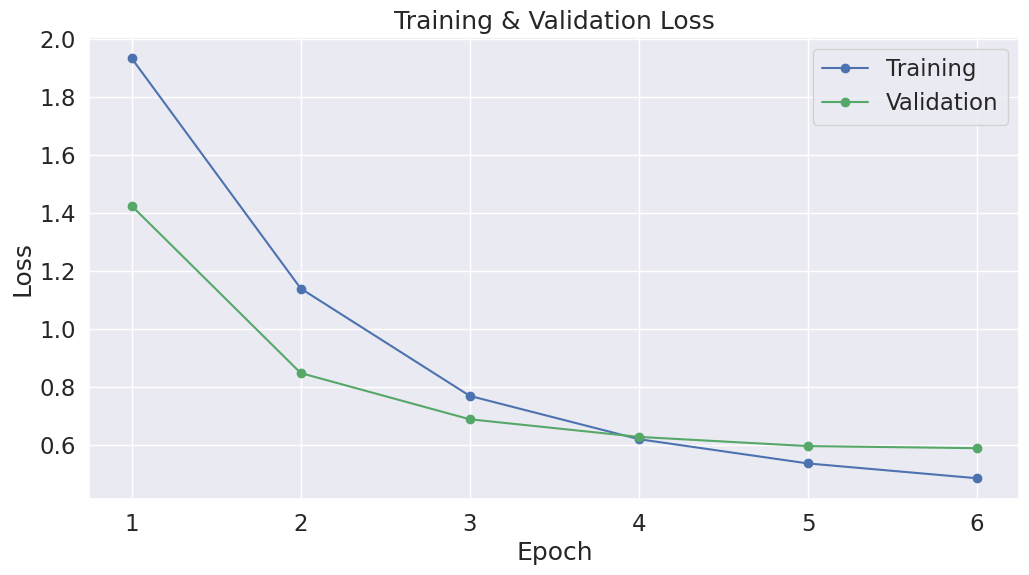

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4, 5, 6])

plt.show()

In [35]:
torch.save(model,"/content/drive/MyDrive/Pibit.ai/bert_cause_85.pth")

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Pibit.ai/test.csv', index_col=5)
test = test.fillna("")
test['LossDescription'] = test['LossDescription'].str.lower()
test['ResultingInjuryDesc'] = test['ResultingInjuryDesc'].str.lower()
test['PartInjuredDesc'] = test['PartInjuredDesc'].str.lower()
test['LossDescription'] = test['LossDescription'].apply(lambda x: cleaning_numbers(x))
test['LossDescription'] = test['LossDescription'].apply(lambda x: cleaning_non_alpha(x))
test['LossDescription'] = test['LossDescription'].apply(lambda x: cleaning_repeating_char(x))

In [ ]:
test.head()

,LossDescription,ResultingInjuryDesc,PartInjuredDesc,Cause - Hierarchy 1,Body Part - Hierarchy 1
Index,,,,,
5,,,thumb,,
17,,,lower arm,,
20,,,abdomen,,
47,ee was getting out of the truck and twisted he...,,,,
48,worker was making a delivery and her right han...,,,,


In [ ]:
sen_test = []

for index, row in test.iterrows():
  combined = ""

  if(row["ResultingInjuryDesc"]!="") and isinstance(row["ResultingInjuryDesc"], str):
    combined += "It was a {:} injury. ".format(row["ResultingInjuryDesc"])
  if(row["PartInjuredDesc"]!="") and isinstance(row["PartInjuredDesc"], str):
    combined += "The injured parts were {:}. ".format(row["PartInjuredDesc"])
  if isinstance(row["LossDescription"], str):
    combined += row["LossDescription"]

  sen_test.append(combined)

In [ ]:
def score(query, match_embeddings, mapping): #semantic search
  query_embedding = model.encode(query)
  similarity_scores = dict(zip(list(mapping.keys()), util.dot_score(query_embedding, match_embeddings)[0].numpy()))
  return max(zip(similarity_scores.values(), similarity_scores.keys()))[1]

In [ ]:
le_name_mapping

{'burn or scald - heat or cold exposures - contact with': 0,
 'caught in under or between': 1,
 'cut puncture scrape injured by': 2,
 'fall slip or trip injury': 3,
 'includes freezing': 4,
 'misc': 5,
 'motor vehicle': 6,
 'rubbed or abraded by': 7,
 'strain or injury by': 8,
 'striking against or stepping on': 9,
 'struck or injured by': 10}

In [ ]:
le_name_mapping['miscellaneous'] = le_name_mapping.pop('misc')
le_name_mapping

{'burn or scald - heat or cold exposures - contact with': 0,
 'caught in under or between': 1,
 'cut puncture scrape injured by': 2,
 'fall slip or trip injury': 3,
 'includes freezing': 4,
 'motor vehicle': 6,
 'rubbed or abraded by': 7,
 'strain or injury by': 8,
 'striking against or stepping on': 9,
 'struck or injured by': 10,
 'miscellaneous': 5}

In [ ]:
name_mapping

{'head': 0,
 'lower extremities': 1,
 'misc': 2,
 'multiple body parts': 3,
 'neck': 4,
 'trunk': 5,
 'upper extremities': 6}

In [ ]:
name_mapping['miscellaneous'] = name_mapping.pop('misc')
name_mapping

{'head': 0,
 'lower extremities': 1,
 'multiple body parts': 3,
 'neck': 4,
 'trunk': 5,
 'upper extremities': 6,
 'miscellaneous': 2}

In [ ]:
body_embeddings = model.encode(list(name_mapping.keys()))

In [ ]:
i=0
for id in test.index:
  test['Cause - Hierarchy 1'][id]=score(sen_test[i], match_embeddings, le_name_mapping)
  test['Body Part - Hierarchy 1'][id]=score(sen_test[i], body_embeddings, name_mapping)
  i=i+1
test.head()

,LossDescription,ResultingInjuryDesc,PartInjuredDesc,Cause - Hierarchy 1,Body Part - Hierarchy 1
Index,,,,,
5,,,thumb,miscellaneous,neck
17,,,lower arm,miscellaneous,neck
20,,,abdomen,miscellaneous,neck
47,ee was getting out of the truck and twisted he...,,,fall slip or trip injury,head
48,worker was making a delivery and her right han...,,,miscellaneous,trunk


In [ ]:
test.to_csv('/content/drive/MyDrive/Pibit.ai/semantic_results_untrained.csv')

In [ ]:
test['LossDescription'][48]

'worker was making a delivery and her right hand was bitten by a dog '

In [ ]:
input_ids_test = []
attention_masks_test = []

for sent in sen_w_feats:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        truncation = True,
                        padding = 'max_length',
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                )

    # Add the encoded sentence to the list.
    input_ids_test.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_test.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_test = torch.cat(input_ids_test, dim=0)
attention_masks_test = torch.cat(attention_masks_test, dim=0)

In [ ]:
test_dataset = TensorDataset(input_ids_test[val_idx], attention_masks_test[val_idx])

In [ ]:
prediction_sampler = SequentialSampler(test_dataset)
prediction_dataloader = DataLoader(test_dataset, sampler=prediction_sampler, batch_size=1)

print('Predicting labels for {:,} test sentences...'.format(len(test_dataset)))
model.eval()

# Tracking variables
predictions = []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids,
                     token_type_ids=None,
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits
  logits = logits.detach().cpu().numpy()
  predictions.append(logits)

Predicting labels for 778 test sentences...


In [ ]:
predictions[0].shape

(1, 11)

In [ ]:
predictions[0]

array([[-0.66577315,  0.33373055,  0.03158566,  0.08649036, -0.46032283,
        -0.76457554,  1.7043169 , -0.8107715 , -0.9961339 ,  0.75710905,
         2.0435667 ]], dtype=float32)

In [ ]:
pred=[]
for k in predictions:
  pred.append(np.argmax(k[0]))
pred

In [ ]:
i=0
for id in test.index:
  test['Cause - Hierarchy 1'][id]=le_name_mapping[pred[i]]
  i=i+1
test.head()

,LossDescription,ResultingInjuryDesc,PartInjuredDesc,Cause - Hierarchy 1,Body Part - Hierarchy 1
Index,,,,,
5,,,thumb,struck or injured by,
17,,,lower arm,fall slip or trip injury,
20,,,abdomen,misc,
47,ee was getting out of the truck and twisted he...,,,strain or injury by,
48,worker was making a delivery and her right han...,,,motor vehicle,


In [ ]:
test['LossDescription'][48]

'worker was making a delivery and her right hand was bitten by a dog '

In [ ]:
test.to_csv('/content/drive/MyDrive/Pibit.ai/cause_85.csv')

Body part classification

In [56]:
df_body = df.drop(['Cause - Hierarchy 1'], axis=1)
df_body = df_body[df_body['Body Part - Hierarchy 1'].notna()]
len(df_body)

3659

In [57]:
df_body['LossDescription'] = df_body['LossDescription'].str.lower()
df_body['ResultingInjuryDesc'] = df_body['ResultingInjuryDesc'].str.lower()
df_body['PartInjuredDesc'] = df_body['PartInjuredDesc'].str.lower()
df_body['Body Part - Hierarchy 1'] = df_body['Body Part - Hierarchy 1'].str.lower()
df_body['Body Part - Hierarchy 1'] = df_body['Body Part - Hierarchy 1'].str.replace(',','')

In [58]:
df_body =df_body.fillna("")

In [59]:
df_body.head(3)

,LossDescription,ResultingInjuryDesc,PartInjuredDesc,Body Part - Hierarchy 1
Index,,,,
577,ee while helping the children clean up after l...,fall or slip injury,lower extremities,lower extremities
1867,clmt was putting bread trays on bottom of brea...,,,neck
3530,he got off of he forklift and did not secure p...,"motor vehicle, noc","foot-metatarsals, heel excl ankle or toe",lower extremities


In [60]:
import re
def cleaning_numbers(data): #removing numbers
    return re.sub('[0-9]+', '', data)

def cleaning_non_alpha(text): #removing non-alpha
  return re.sub("[^a-z0-9]"," ", text)

def cleaning_repeating_char(text): #removing repeating characters
    return re.sub(r'(.)1+', r'1', text)

df_body['LossDescription'] = df_body['LossDescription'].apply(lambda x: cleaning_numbers(x))
df_body['LossDescription'] = df_body['LossDescription'].apply(lambda x: cleaning_non_alpha(x))
df_body['LossDescription'] = df_body['LossDescription'].apply(lambda x: cleaning_repeating_char(x))

In [61]:
import random
import numpy as np

train_size = int(0.8 * len(df_body))
val_size = int(0.2 * len(df_body))

indeces = np.arange(0, len(df_body))
random.shuffle(indeces)

train_idx = indeces[0:train_size]
val_idx = indeces[train_size:(train_size + val_size)]

assert(len(train_idx) == train_size)
assert(len(val_idx) == val_size)

print('  Training size: {:,}'.format(train_size))
print('Validation size: {:,}'.format(val_size))

  Training size: 2,927
Validation size: 731


In [62]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_body['Body Part - Hierarchy 1'] = label_encoder.fit_transform(df_body['Body Part - Hierarchy 1'] )
df_body['Body Part - Hierarchy 1'].unique()

array([1, 4, 6, 5, 0, 3, 2])

In [63]:
name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
name_mapping

{'head': 0,
 'lower extremities': 1,
 'misc': 2,
 'multiple body parts': 3,
 'neck': 4,
 'trunk': 5,
 'upper extremities': 6}

In [64]:
sen_w_feats = []
labels = []

for index, row in df_body.iterrows():
  combined = ""

  if(row["ResultingInjuryDesc"]!="") and isinstance(row["ResultingInjuryDesc"], str):
    combined += "it was a {:} injury. ".format(row["ResultingInjuryDesc"])
  if(row["PartInjuredDesc"]!="") and isinstance(row["PartInjuredDesc"], str):
    combined += "the injured parts were {:}. ".format(row["PartInjuredDesc"])
  if isinstance(row["LossDescription"], str):
    combined += row["LossDescription"]

  sen_w_feats.append(combined)
  labels.append(row["Body Part - Hierarchy 1"])

sen_w_feats[56], labels[56]

('it was a strain or injury by injury. the injured parts were lower extremities. employee was playing basketball with resident  jumped to shoot ball  landed hard on right ankle  fracture',
 1)

In [65]:
lab=[]

for k in labels:
  h=[0,0,0,0,0,0,0,0,0,0,0]
  h[k]=1
  lab.append(h)
lab[56]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [66]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [10]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [81]:
from transformers import BertForSequenceClassification

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 7, # The number of outputs for multi-label classification.
)

# Tell pytorch to run this model on the GPU.
desc = model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [82]:
batch_size = 32
learning_rate = 1e-5
epochs = 6

In [83]:
max_len = 0

for sent in sen_w_feats:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  123


In [84]:
max_len=120

In [85]:
input_ids = []
attention_masks = []

for sent in sen_w_feats:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        truncation = True,
                        padding = 'max_length',
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(lab)

In [86]:
from torch.utils.data import TensorDataset

# Split the samples, and create TensorDatasets for each split.
train_dataset = TensorDataset(input_ids[train_idx], attention_masks[train_idx], labels[train_idx])
val_dataset = TensorDataset(input_ids[val_idx], attention_masks[val_idx], labels[val_idx])

In [87]:
len(train_dataset), len(val_dataset)

(2927, 731)

In [88]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [89]:
len(train_dataloader), len(validation_dataloader)

(92, 23)

In [90]:
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

optimizer = AdamW(model.parameters(),
                  lr = learning_rate,
                  eps = 1e-8
                )
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [91]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [92]:
# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

In [93]:
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0

    # Put the model into training mode
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 10 batches.
        if step % 10 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        # As we unpack the batch, we'll also copy each tensor to the GPU.
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        result = model(b_input_ids,
                       token_type_ids=None,
                       attention_mask=b_input_mask,
                       labels=b_labels.argmax(dim=1),
                       return_dict=True)

        loss = result.loss
        logits = result.logits
        total_train_loss += loss.item()

        loss.backward()

        # Clip the norm of the gradients to 1.0.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this validation batch from our dataloader.
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            result = model(b_input_ids,
                           token_type_ids=None,
                           attention_mask=b_input_mask,
                           labels=b_labels.argmax(dim=1),
                           return_dict=True)

        # Get the loss and "logits" output by the model.
        loss = result.loss
        logits = result.logits

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.argmax(dim=1).to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 6 ========
Training...
  Batch    10  of     92.    Elapsed: 0:00:06.
  Batch    20  of     92.    Elapsed: 0:00:12.
  Batch    30  of     92.    Elapsed: 0:00:18.
  Batch    40  of     92.    Elapsed: 0:00:24.
  Batch    50  of     92.    Elapsed: 0:00:30.
  Batch    60  of     92.    Elapsed: 0:00:36.
  Batch    70  of     92.    Elapsed: 0:00:42.
  Batch    80  of     92.    Elapsed: 0:00:48.
  Batch    90  of     92.    Elapsed: 0:00:54.

  Average training loss: 1.72
  Training epcoh took: 0:00:55

Running Validation...
  Accuracy: 0.50
  Validation Loss: 1.40
  Validation took: 0:00:05

======== Epoch 2 / 6 ========
Training...
  Batch    10  of     92.    Elapsed: 0:00:06.
  Batch    20  of     92.    Elapsed: 0:00:12.
  Batch    30  of     92.    Elapsed: 0:00:17.
  Batch    40  of     92.    Elapsed: 0:00:23.
  Batch    50  of     92.    Elapsed: 0:00:29.
  Batch    60  of     92.    Elapsed: 0:00:35.
  Batch    70  of     92.    Elapsed: 0:00:41.
  Batch  

In [94]:
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,1.721178,1.398058,0.502919,0:00:55,0:00:05
2,1.046399,0.600983,0.874748,0:00:53,0:00:05
3,0.526727,0.355760,0.914151,0:00:54,0:00:05
4,0.333378,0.271641,0.929096,0:00:54,0:00:05
5,0.255397,0.249973,0.931562,0:00:54,0:00:05
6,0.221216,0.242253,0.932921,0:00:54,0:00:05


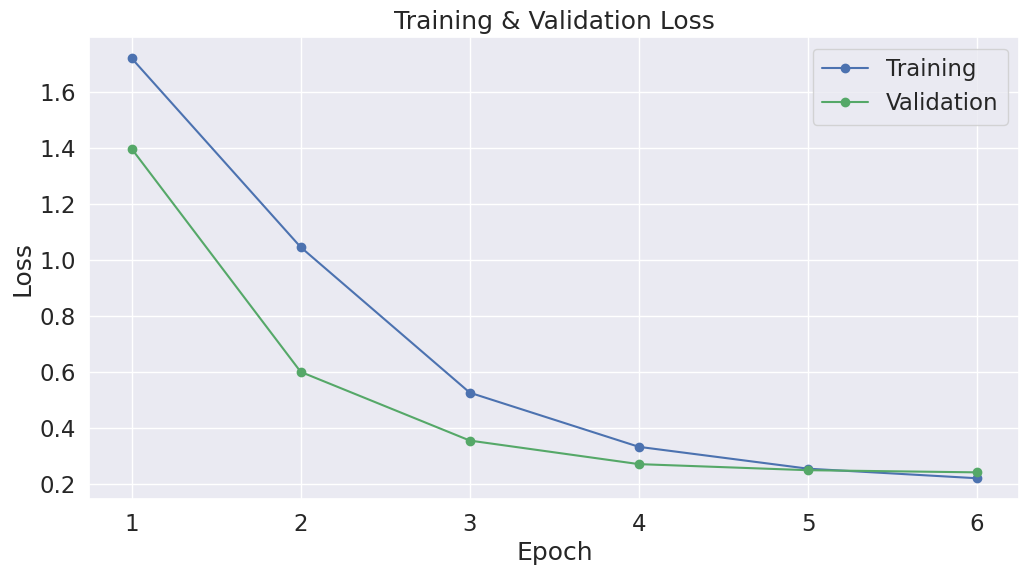

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4, 5, 6])

plt.show()

In [96]:
torch.save(model,"/content/drive/MyDrive/Pibit.ai/bert_body_93.pth")

Testing

In [2]:
import torch
model_body = torch.load("/content/drive/MyDrive/Pibit.ai/bert_body_93.pth")
model_body.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [3]:
model_cause = torch.load("/content/drive/MyDrive/Pibit.ai/bert_cause_85.pth")
model_cause.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [4]:
import pandas as pd
import re
def cleaning_numbers(data): #removing numbers
    return re.sub('[0-9]+', '', data)

def cleaning_non_alpha(text): #removing non-alpha
  return re.sub("[^a-z0-9]"," ", text)

def cleaning_repeating_char(text): #removing repeating characters
    return re.sub(r'(.)1+', r'1', text)


test=pd.read_csv('/content/drive/MyDrive/Pibit.ai/test.csv', index_col=5)
test = test.fillna("")
test['LossDescription'] = test['LossDescription'].str.lower()
test['ResultingInjuryDesc'] = test['ResultingInjuryDesc'].str.lower()
test['PartInjuredDesc'] = test['PartInjuredDesc'].str.lower()
test['LossDescription'] = test['LossDescription'].apply(lambda x: cleaning_numbers(x))
test['LossDescription'] = test['LossDescription'].apply(lambda x: cleaning_non_alpha(x))
test['LossDescription'] = test['LossDescription'].apply(lambda x: cleaning_repeating_char(x))

In [5]:
test.head()

,LossDescription,ResultingInjuryDesc,PartInjuredDesc,Cause - Hierarchy 1,Body Part - Hierarchy 1
Index,,,,,
5,,,thumb,,
17,,,lower arm,,
20,,,abdomen,,
47,ee was getting out of the truck and twisted he...,,,,
48,worker was making a delivery and her right han...,,,,


In [6]:
test=test.reset_index()

In [7]:
test_idx = []
for id in test.index:
  test_idx.append(id)

In [8]:
sen_test = []

for index, row in test.iterrows():
  combined = ""

  if(row["ResultingInjuryDesc"]!="") and isinstance(row["ResultingInjuryDesc"], str):
    combined += "It was a {:} injury. ".format(row["ResultingInjuryDesc"])
  if(row["PartInjuredDesc"]!="") and isinstance(row["PartInjuredDesc"], str):
    combined += "The injured parts were {:}. ".format(row["PartInjuredDesc"])
  if isinstance(row["LossDescription"], str):
    combined += row["LossDescription"]

  sen_test.append(combined)

In [11]:
input_ids_test = []
attention_masks_test = []

for sent in sen_test:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 120,           # Pad & truncate all sentences.
                        truncation = True,
                        padding = 'max_length',
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                )

    # Add the encoded sentence to the list.
    input_ids_test.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_test.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_test = torch.cat(input_ids_test, dim=0)
attention_masks_test = torch.cat(attention_masks_test, dim=0)

In [21]:
from torch.utils.data import TensorDataset
test_dataset = TensorDataset(input_ids_test[test_idx], attention_masks_test[test_idx])

In [22]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
prediction_sampler = SequentialSampler(test_dataset)
prediction_dataloader = DataLoader(test_dataset, sampler=prediction_sampler, batch_size=1, shuffle=False)

#model.eval()
predictions = []

for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(torch.device("cuda")) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model_cause(b_input_ids,
                     token_type_ids=None,
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits
  logits = logits.detach().cpu().numpy()
  predictions.append(logits)

In [23]:
predictions[0].shape

(1, 11)

In [24]:
len(predictions)

435

In [25]:
predictions[0]

array([[-0.6713281 ,  0.7832216 , -0.49874955, -1.0469275 , -0.59165734,
         0.68216425, -0.25805393, -0.26281917, -0.49547994,  0.54716706,
         1.5059128 ]], dtype=float32)

In [ ]:
import numpy as np
pred=[]
for k in predictions:
  pred.append(np.argmax(k[0]))
pred

In [28]:
le_name_mapping={'burn or scald - heat or cold exposures - contact with': 0,
 'caught in under or between': 1,
 'cut puncture scrape injured by': 2,
 'fall slip or trip injury': 3,
 'includes freezing': 4,
 'motor vehicle': 6,
 'rubbed or abraded by': 7,
 'strain or injury by': 8,
 'striking against or stepping on': 9,
 'struck or injured by': 10,
 'misc': 5}

le_name_mapping = dict([(value, key) for key, value in le_name_mapping.items()])

In [ ]:
i=0
for id in test.index:
  test['Cause - Hierarchy 1'][id]=le_name_mapping[pred[i]]
  i=i+1
test.head()

In [30]:
test.head()

,Index,LossDescription,ResultingInjuryDesc,PartInjuredDesc,Cause - Hierarchy 1,Body Part - Hierarchy 1
0,5,,,thumb,struck or injured by,
1,17,,,lower arm,struck or injured by,
2,20,,,abdomen,misc,
3,47,ee was getting out of the truck and twisted he...,,,strain or injury by,
4,48,worker was making a delivery and her right han...,,,struck or injured by,


In [31]:
name_mapping={'head': 0,
 'lower extremities': 1,
 'misc': 2,
 'multiple body parts': 3,
 'neck': 4,
 'trunk': 5,
 'upper extremities': 6}

In [32]:
name_mapping = dict([(value, key) for key, value in name_mapping.items()])

In [33]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
prediction_sampler = SequentialSampler(test_dataset)
prediction_dataloader = DataLoader(test_dataset, sampler=prediction_sampler, batch_size=1, shuffle=False)

#model.eval()
predictions = []

for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(torch.device("cuda")) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model_body(b_input_ids,
                     token_type_ids=None,
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits
  logits = logits.detach().cpu().numpy()
  predictions.append(logits)

In [ ]:
import numpy as np
pred=[]
for k in predictions:
  pred.append(np.argmax(k[0]))
pred

In [35]:
len(pred)

435

In [ ]:
i=0
for id in test.index:
  test['Body Part - Hierarchy 1'][id]=name_mapping[pred[i]]
  i=i+1
test.head()

In [37]:
test.head()

,Index,LossDescription,ResultingInjuryDesc,PartInjuredDesc,Cause - Hierarchy 1,Body Part - Hierarchy 1
0,5,,,thumb,struck or injured by,upper extremities
1,17,,,lower arm,struck or injured by,upper extremities
2,20,,,abdomen,misc,trunk
3,47,ee was getting out of the truck and twisted he...,,,strain or injury by,lower extremities
4,48,worker was making a delivery and her right han...,,,struck or injured by,upper extremities


In [38]:
test.to_csv('/content/drive/MyDrive/Pibit.ai/bert_results.csv')